In [2]:
import pandas as pd
import numpy as np
import csv

1\. Perform the following operations on plain `txt` files:

+ create a list of integrer numbers and then save it to a text file named "data_int.txt". Run the `cat` command to print the content of the file.
+ create a matrix of 5x5 floats and then save it to a text file named "data_float.txt". Use the `cat` command to print the content of the file.
+ load the txt file of the previous point and convert it to a csv file by hand.

In [ ]:
out_file_name = "data/data_int.txt"

mylist = [i for i in range(21)]

with open(out_file_name, 'w') as outfile:
    for i in mylist:
        outfile.write(str(i) + '\n')

!cat data/data_int.txt

In [ ]:
out_file_name = "data/data_float.txt"

myarr = np.random.random((5,5))

with open(out_file_name, 'w') as outfile:
    for i in myarr:
        outfile.write(str(i) + '\n')

!cat data/data_float.txt

In [3]:
with open('data/data_float.txt', 'r') as infile:

    lines = [ line.replace('[', '').replace(']', '') for line in infile ]
    stripped = [ line.strip().split(' ') for line in lines ]

    with open('data/data_float.csv', 'w') as outfile:
        writer = csv.writer(outfile)
        writer.writerows(stripped)

2\. Load the file *user_data.json*, which can be found at:

- https://www.dropbox.com/s/sz5klcdpckc39hd/user_data.json

and filter the data by the "CreditCardType" when it equals to "American Express". Than save the data to a new CSV file.

In [4]:
import json

#!wget https://www.dropbox.com/s/sz5klcdpckc39hd/user_data.json -P data/

data = json.load(open('data/user_data.json'))
filtered_data = [x for x in data if x['CreditCardType'] == 'American Express']
df = pd.DataFrame(filtered_data)

df.to_csv('data/user_data.csv', index = None)

3\. Load the file from this url:

- https://www.dropbox.com/s/kgshemfgk22iy79/mushrooms_categorized.csv

with Pandas. 

+ explore and print the DataFrame
+ calculate, using `groupby()`, the average value of each feature, separately for each class
+ save the file in a JSON format.

In [ ]:
url = 'https://www.dropbox.com/s/kgshemfgk22iy79/mushrooms_categorized.csv'

data = pd.read_csv(url)

print(data)

In [17]:
#!wget https://www.dropbox.com/s/kgshemfgk22iy79/mushrooms_categorized.csv -P data/

# ex 2.1
df = pd.read_csv("data/mushrooms_categorized.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [18]:
# ex 2.2
df_grouped = df.groupby('class')
df_grouped.mean()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,,,,,,,,,,,,,,,,,,,,,
0,3.266160,1.615970,4.581749,0.653992,4.334601,0.954373,0.285171,0.068441,6.622624,0.615970,...,1.798479,6.098859,6.064639,0.0,1.931559,1.125475,3.007605,3.201521,3.283270,1.148289
1,3.436159,2.055158,4.421859,0.159346,3.940756,0.995403,0.028601,0.567926,2.863636,0.514811,...,1.394280,5.512768,5.504597,0.0,2.002043,1.009193,1.522983,4.021450,4.031665,1.895812


In [ ]:
# ex 2.3
df.to_json('data/mushrooms_categorized.json', orient = 'columns')
!cat data/mushrooms_categorized.json

#CHECK BCS MAYBE THE DF CHANGED AFTER GROUPBY

4\. Get the binary file named *credit_card.dat* from this address:

- https://www.dropbox.com/s/8m0syw2tkul3dap/credit_card.dat

and convert the data into the real credit card number, knowing that:
- each line corresponds to a credit card number, which consists of 16 characters (which are numbers in the 0-9 range) divided in 4 blocks, with a whitespace between each block
- each character is written using a 6 bit binary representation (including the whitespace)
- the final 4 bits of each line are a padding used to determine the end of the line, and can be ignored

*Hint*: convert the binary numbers to the decimal representation first, and then use the `chr()` function to convert the latter to a char

In [22]:
#!wget https://www.dropbox.com/s/8m0syw2tkul3dap/credit_card.dat -P data/

with open('data/credit_card.dat','rb') as infile:
    file_content = infile.read()
    char_counter = 0
    char_size = 6
    for i in range(0, len(file_content), char_size):
        char_counter += 1
        if char_counter <= 16:
            character = file_content[i : i + char_size]
            character = int(character, 2)
        else:
            char_counter = 0
            i-=2


ValueError: invalid literal for int() with base 2: b'1010\n1'

In [ ]:
import struct, time

with open('data/data_000637.dat','rb') as file:
    file_content = file.read()
    word_counter = 0
    word_size = 8 # size of the word in bytes
    for i in range(0, len(file_content), word_size):
        word_counter += 1
        if word_counter > 10: break
        word = struct.unpack('<q', file_content[i : i + word_size])[0] # get an 8-byte word
        head     = (word >> 62) & 0x3 ## move to the right of 62 places -> get smthing like (0 0 0 ... 0 x x)
        ## and apply the mask 0x3 = (0 ... 0 1 1) -> get the last two bits
        fpga     = (word >> 58) & 0xF
        tdc_chan = (word >> 49) & 0x1FF
        orb_cnt  = (word >> 17) & 0xFFFFFFFF
        bx       = (word >> 5 ) & 0xFFF
        tdc_meas = (word >> 0 ) & 0x1F
        if i == 0: print ('{0}\t{1}\t{2}\t{3}\t{4}\t{5}'.format('HEAD', 'FPGA', 'CHANNEL', 'ORBIT_CNT', 'BX_CNT', 'TDC_MEAS'))
        print('{0}\t{1}\t{2}\t{3}\t{4}\t{5}'.format(head, fpga, tdc_chan, orb_cnt, bx, tdc_meas))

5\. **Optional**: load the remote file:

- https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv

with Pandas and create a scatter plot with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3

<AxesSubplot:xlabel='features_1', ylabel='features_3'>

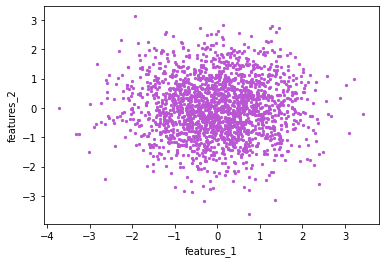

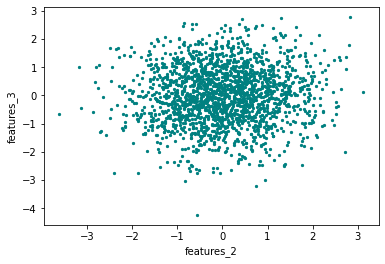

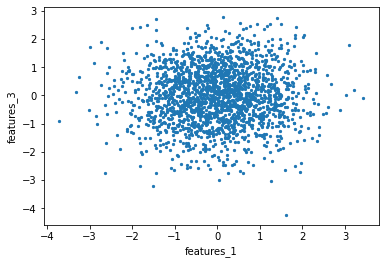

In [36]:
#!wget 'https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv' -P data/

df = pd.read_csv('data/regression_generated.csv')

df.plot.scatter('features_1', 'features_2', marker='.', color='mediumorchid')
df.plot.scatter('features_2', 'features_3', marker='.', color='teal')
df.plot.scatter('features_1', 'features_3', marker='.')